# **Import Libraries and modules**

Installing and importing keras (python library for creating and working with neural networks)

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing the required libraries

- numpy (python library for performing optimized numeric computations on multi dimensional arrays)
- Sequential model (a linear stack of layers) from keras.models
- Dense (used to create densely connected neural network)
- Dropout (used to make some neurons zero)
- Activation
- Flatten (used to convert to 1D)
- Add
- Convolution2D (used to add 2D Convolutional layers)
- MaxPooling2D
- np_utils (numpy related utilities)  
- EarlyStopping

Importing mnist which is the dataset of images of handwritten digits

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Loading the data from mnist dataset into X_train, y_train, X_test, y_test which are numpy ndarrays (n dimensional arrays)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


- X_train.shape prints the dimensions of the nd array. It consists of pixel values for 60000 images, each of 28x28 pixels
- matplotlib is the library for plotting in python
- pyplot is a MATLAB-like plotting framework for python
- %matplotlib inline sets the backend of matplotlib to 'inline' which will print the output of plotting commands inline
- imshow plots the image

(60000, 28, 28)


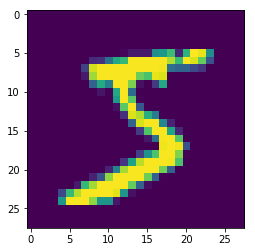

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

- Reshaping each one of the 60000 images to 28x28x1 in X_train
- Reshaping each one of the 10000 images to 28x28x1 in X_train

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

- Type casting the pixel values in X_train and X_test to float32 data type
- Normalizing the pixel values by diving by 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

- Printing the first 10 values in y_train

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

- One-hot encoding the categorical data into a matrix form which can be fed into a ML model

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

- Printing the value of first 10 entries in Y_train (after one-hot encoding)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

- Import Activation keras.layers

- Create a Sequential model and add convolutional layers to it, using ReLU activation function

28x28x1    |  3x3x1x32        RF=3x3  
26x26x32  |  1x1x32x10     
26x26x10  |  26x26x10x10    
1x1x10                             

- Flatten operation which flattens the input
- Add an Activation layer to perform softmax operation


In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

W0817 04:56:58.856059 139906102675328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0817 04:56:58.894526 139906102675328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 04:56:58.902326 139906102675328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



- Print model summary

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


- Configure the model for training. Specifying categorical_crossentropy as the loss function, adam as the optimizer and accuracy as the metric

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0817 04:57:07.204702 139906102675328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 04:57:07.230408 139906102675328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



- Train the model using X_train and y_train for 10 epochs and batch size of 32

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0817 04:57:15.607567 139906102675328 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0817 04:57:15.669565 139906102675328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.2212 - acc: 0.9359
Epoch 2/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0806 - acc: 0.9757
Epoch 3/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0582 - acc: 0.9822
Epoch 4/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0469 - acc: 0.9852
Epoch 5/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0367 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0287 - acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0232 - acc: 0.9923
Epoch 8/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0178 - acc: 0.9941
Epoch 9/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0151 - acc: 0.9950
Epoch 10/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0119 - 

- Run the model in test mode

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

- Print the result of above test (loss value and accuracy)

In [0]:
print(score)

[0.09296982603095166, 0.9801]


- Predict the output for X_test

In [0]:
y_pred = model.predict(X_test)

- Print the predicted output and actual output for X_test

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[9.5138753e-20 3.7500411e-20 2.5350229e-14 3.3563737e-07 4.7736460e-22
  1.2082779e-17 1.5935858e-32 9.9999964e-01 2.0365239e-11 5.5304313e-11]
 [2.8460671e-12 4.0955818e-14 1.0000000e+00 8.5884745e-15 1.6836988e-21
  6.1357161e-19 2.9816930e-11 9.1233353e-28 1.4972895e-14 5.6802731e-23]
 [3.1844144e-10 9.9995971e-01 1.5777773e-06 1.6884642e-10 2.3105560e-05
  3.7688117e-10 2.0004862e-10 5.5474101e-07 1.5135188e-05 4.7009485e-10]
 [1.0000000e+00 7.4426512e-26 9.7388327e-11 1.9425543e-18 2.0805287e-19
  2.0702477e-16 2.4778216e-10 2.5652874e-14 2.6018521e-13 3.1491225e-14]
 [6.9433620e-15 2.5338680e-18 5.5570787e-15 2.8943826e-13 1.0000000e+00
  3.0854923e-18 2.1146995e-15 2.7703639e-10 5.8713669e-09 3.2562912e-09]
 [3.3090577e-12 9.9994564e-01 6.1681980e-09 1.5367914e-10 9.4621123e-07
  1.3448228e-14 5.1175373e-13 3.3768749e-05 1.9611365e-05 1.3498090e-09]
 [2.5565795e-19 1.6291624e-13 1.6418557e-09 1.8899578e-14 9.9998975e-01
  1.1142270e-12 1.8745346e-18 4.8547348e-09 1.0274541e-05 

- Creating a python dictionary containing model layers (layer name is the key and layer is the value)

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

**Visualizing images captured by filters**  

- vis_img_in_filter() function defined below accepts layer_name as a parameter. Below we have provided conv2d_1 as the layer_name which is the first layer of the above network.

- We pick one training example as input for the below function and this is reshaped to 1x28x28x1

- layer_output.shape[3] gives the number of channels in the output of the layer considered

- Every output channel is created using a filter. We want to visualize what the filters are trying to capture. So, for each filter we build a loss function. Loss function is built such that it maximizes the activation of the filter.

- gradient with respect to the above loss is calculated

- the input image is updated by performing gradient ascent using the loss and gradient calculated above

- the image which has been in the form of a tensor for above operations is then converted to a valid image using deprocess_image() function

- the image is then plotted

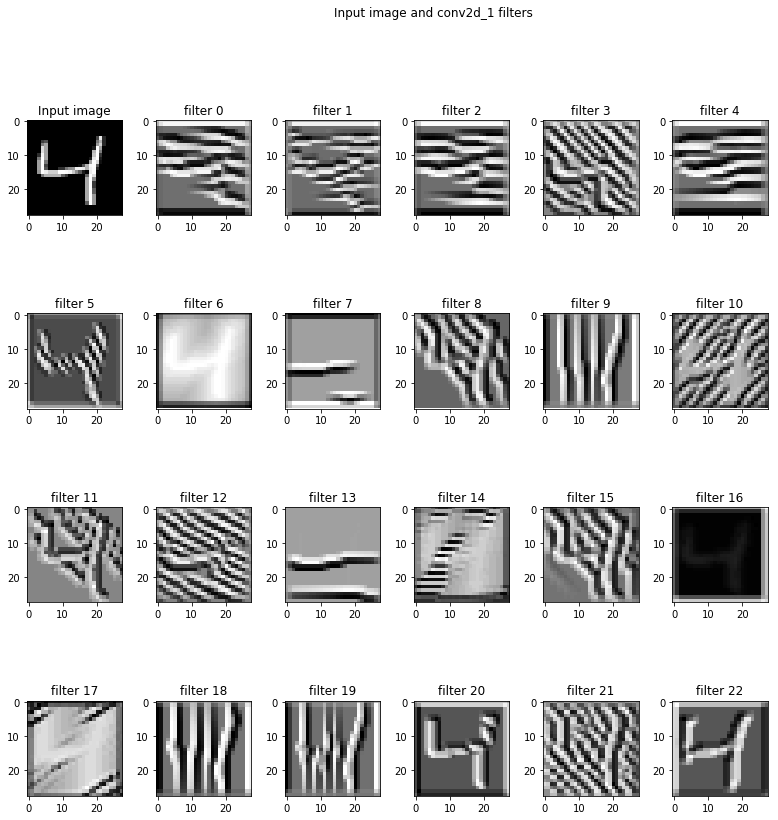

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

### Defining a new network such that it has less than 20,000 parameters and achieves a validation accuracy of above 99.3%

- Network Architecture 

28x28x1    |  3x3x1x12        RF=3x3  
26x26x12  |  3x3x12x16      RF=5x5       
24x24x16  |  **Max Pooling**   RF=10x10  
12x12x16  |  3x3x16x16     RF=12x12  
10x10x16  |  3x3x16x20     RF=14x14  
8x8x20      |  3x3x20x22      RF=16x16  
6x6x22      |  3x3x22x24      RF=18x18  
4x4x24      | 4x4x10  
1x1x10  

- In a large network like this where the total parameters are around 19,000; bias (a very small quantity) in comparison) will not result in an observable difference in the network. Hence bias can be removed by setting bias=False as shown below

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1), bias=False))
model.add(Convolution2D(16, 3, 3, activation='relu', bias=False))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3, activation='relu', bias=False))
model.add(Convolution2D(20, 3, 3, activation='relu', bias=False))
model.add(Convolution2D(22, 3, 3, activation='relu', bias=False))
model.add(Convolution2D(24, 3, 3, activation='relu', bias=False))
model.add(Convolution2D(10, 4, bias=False))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_181 (Conv2D)          (None, 26, 26, 12)        108       
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 24, 24, 16)        1728      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 10, 10, 16)        2304      
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 8, 8, 20)          2880      
_________________________________________________________________
conv2d_185 (Conv2D)          (None, 6, 6, 22)          3960      
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 4, 4, 24)          4752      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", use_bias=False)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(22, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib

EarlyStopping is used to stop training the model based on a condition 
- **monitor** parameter accepts the value to be monitored after each epoch. 
- **mode** conveys if the monitored value is desired to increase (max) or decrease (min).
- **verbose** is the verbosity mode; if verbosity=1, it prints the number of the epoch at which the training was stopped. 
- **patience** is the number of epochs to wait to see if there is improvement before stopping the training
- **restore_best_weights** tells if the best weights are to be restored after EarlyStopping

In [0]:
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=5, restore_best_weights=True)

- Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

- Train the model. EarlyStopping callback is provided while training so that training can be stopped early if monitored value does not improve

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[es])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 12s 201us/step - loss: 0.2061 - acc: 0.9348 - val_loss: 0.0555 - val_acc: 0.9811
Epoch 2/15
60000/60000 [==============================] - 10s 169us/step - loss: 0.0613 - acc: 0.9810 - val_loss: 0.0384 - val_acc: 0.9870
Epoch 3/15
60000/60000 [==============================] - 10s 168us/step - loss: 0.0483 - acc: 0.9851 - val_loss: 0.0540 - val_acc: 0.9828
Epoch 4/15
60000/60000 [==============================] - 10s 167us/step - loss: 0.0387 - acc: 0.9877 - val_loss: 0.0282 - val_acc: 0.9899
Epoch 5/15
60000/60000 [==============================] - 10s 168us/step - loss: 0.0312 - acc: 0.9903 - val_loss: 0.0338 - val_acc: 0.9889
Epoch 6/15
60000/60000 [==============================] - 10s 169us/step - loss: 0.0294 - acc: 0.9909 - val_loss: 0.0259 - val_acc: 0.9918
Epoch 7/15
60000/60000 [==============================] - 10s 168us/step - loss: 0.0244 - acc: 0.9923 - val_loss: 0.

- Model was stopped at 14th epoch since validation accuracy did not improve for 5 epochs (since 9th epoch)
- Best weights (weights of the 9th epoch) are restored
- Validation accuracy of 99.31% achieved

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.023431709013739237, 0.9931]
